# Oscar Dataset project

## Author:FARHANA HOQUE

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [8]:
# Load the Oscar dataset
dataset_oscar = pd.read_excel(r"F:\ABP\Oscar Dataset only.xlsx")
print(dataset_oscar.head())

   Year                Title  OscarNominations  Winner
0  1984    A Soldier's Story                 3       0
1  1984  Places in the Heart                 7       0
2  1984   The Killing Fields                 7       0
3  1984   A Passage to India                11       0
4  1984              Amadeus                11       1


In [9]:
# Logistic regression
X = dataset_oscar[['OscarNominations']]
y = dataset_oscar['Winner']
logistic_model = sm.Logit(y, sm.add_constant(X)).fit()
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.361964
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Winner   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                  0.2767
Time:                        20:47:03   Log-Likelihood:                -43.436
converged:                       True   LL-Null:                       -60.048
Covariance Type:            nonrobust   LLR p-value:                 8.207e-09
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.2135      1.109     -5.601      0.000      -8.388      -4.039
OscarNomina

In [10]:
# Predict Winner based on logistic_model
predicted_winner = logistic_model.predict(sm.add_constant(X))
print(predicted_winner)


0      0.011825
1      0.114877
2      0.114877
3      0.584660
4      0.584660
         ...   
115    0.114877
116    0.021254
117    0.114877
118    0.190631
119    0.190631
Length: 120, dtype: float64


In [11]:
# Classify predictions based on a threshold
threshold = 0.5
predicted_winner_class = np.where(predicted_winner > threshold, 1, 0)
print(predicted_winner_class)

[0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [12]:
# Confusion matrix
conf_matrix = confusion_matrix(y, predicted_winner_class)
print(conf_matrix)

[[91  5]
 [13 11]]


In [13]:
# Accuracy
accuracy = accuracy_score(y, predicted_winner_class)
print("Accuracy:", accuracy)

Accuracy: 0.85


In [14]:
# Classification tree model on Oscar dataset
tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)

DecisionTreeClassifier()

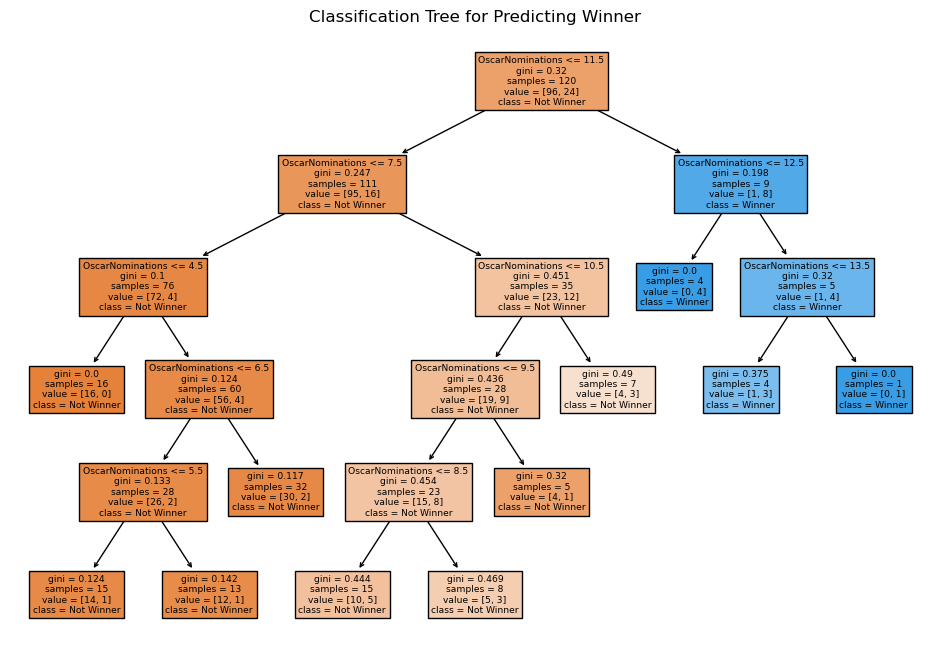

In [15]:
# Plot tree
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_model, filled=True, feature_names=['OscarNominations'], class_names=['Not Winner', 'Winner'])
plt.title("Classification Tree for Predicting Winner")
plt.show()

In [16]:
# Predict Winner based on tree_model
predicted_winner_tree = tree_model.predict(X)
print(predicted_winner_tree)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [17]:
# Confusion matrix for tree model
conf_matrix_tree = confusion_matrix(y, predicted_winner_tree)
print(conf_matrix_tree)

[[95  1]
 [16  8]]


In [18]:
# Accuracy for tree model
accuracy_tree = accuracy_score(y, predicted_winner_tree)
print("Accuracy (Tree Model):", accuracy_tree)

Accuracy (Tree Model): 0.8583333333333333


# Done